In [19]:
#WELCOME, MY NAME IS JEFFERSON PINZON AND TODAY I'M GOING TO SHOW YOU HOW TO USE NEURAL NETWORKS TO PREDICT WHETHER A PERSON IS MALE O FEMALE

#COLOMBIA PRESENT!!!

#BEGIN

#Import Libraries

import pandas as pd
from pandas import read_csv

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import cross_val_score, StratifiedKFold,train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


from sklearn.feature_extraction.text import CountVectorizer

In [20]:
#THIS DATA SET CONSISTS OF GRADES EARNED BY STUDENTS IN VARIOUS SUBJECTS
url='http://roycekimmons.com/system/generate_data.php?dataset=exams&n=1000'
dataset1=pd.read_csv(url)
dataset=dataset1[['gender','math score', 'reading score' ,'writing score']]
print(dataset.shape)

(1000, 4)


In [21]:
#DISPLAY THE FIRST ENTRIES
dataset.head() 

,gender,math score,reading score,writing score
0,female,61,71,68
1,male,68,65,58
2,male,81,80,78
3,male,55,52,50
4,male,50,48,47


In [22]:
# SHOW A STATISTICA SUMMARY OF THE DATA
print(dataset.describe())

        math score  reading score  writing score
count  1000.000000    1000.000000    1000.000000
mean     66.030000      69.002000      67.733000
std      15.237299      14.545362      15.242048
min      24.000000      27.000000      17.000000
25%      55.000000      59.000000      57.000000
50%      67.000000      69.000000      68.000000
75%      76.000000      79.000000      78.000000
max     100.000000     100.000000     100.000000


In [23]:
#DISTRIBUTION BY CLASSES
print(dataset.groupby('gender').size()) 

gender
female    502
male      498
dtype: int64


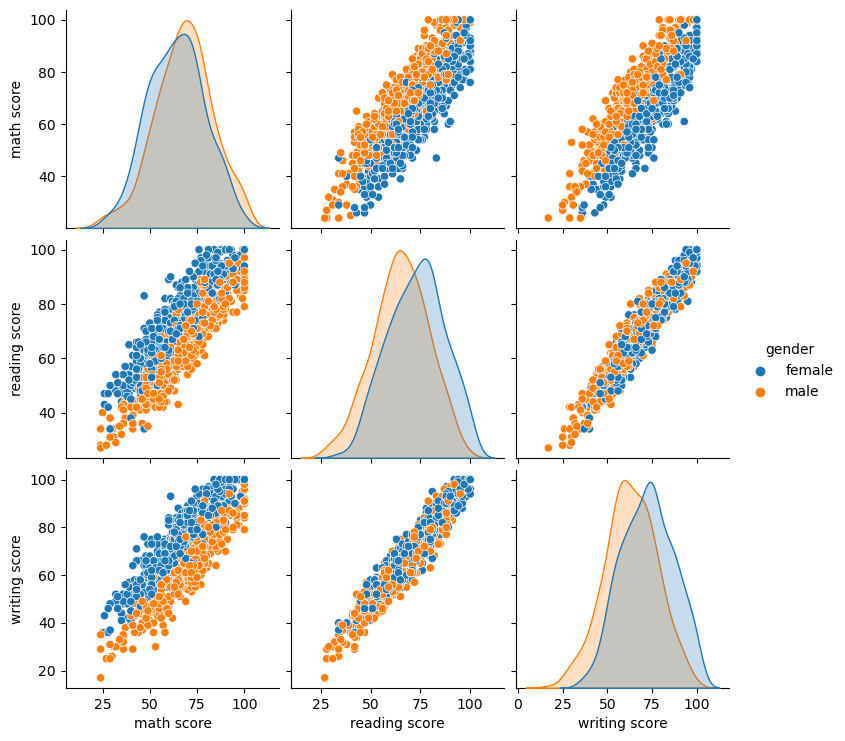

In [24]:
# WE LOOK AT THE ORGANIZATION OF THE DATA
sns.pairplot(data=dataset,vars=('math score', 'reading score' ,'writing score'),hue='gender')
plt.show()

In [25]:
# CHANGE THE CATEGORICAL VARIABLE SEX TO THE NUMERIC VARIABLE SEX
dataset1=pd.get_dummies(dataset,columns=['gender'],drop_first=True)
dataset1.head()
#Female=0 y male=1

,math score,reading score,writing score,gender_male
0,61,71,68,0
1,68,65,58,1
2,81,80,78,1
3,55,52,50,1
4,50,48,47,1


In [26]:
# DIVIDE THE DATA SET INTO 80% DATA FOR TRAINING
array=dataset1.values
X=array[:,0:3] #QUALIFICATIONS
y=array[:,-1]  #DATA GENDER

In [27]:
train_dataset = dataset.sample(frac=0.8,random_state=0)
test_dataset = dataset.drop(train_dataset.index) #20% FOR TESTS

In [28]:
#SPLIT THE ARRAY INTO RANDOM SUBSETS OF THE TRAINING AND TEST DATA
X_train, X_validation , Y_train, Y_validation= train_test_split(X,y,test_size=0.20,random_state=1, shuffle=True)

In [29]:
# LOAD ALGORITHMS
models=[]
models.append(("RFC", RandomForestClassifier(n_jobs=2, random_state=0)))
models.append(("GNB", GaussianNB()))
models.append(("SVM", SVC(gamma='auto')))

In [30]:
#EVALUATING EACH MODEL IN TURN USING CROSS VALIDATION
names=[]
results=[]
print('Método    Media     desviación estándar')
for name, model in models:
    kfold = StratifiedKFold(n_splits=11, random_state=1,shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s:     %f     (%f)' % (name, cv_results.mean(), cv_results.std()))

Método    Media     desviación estándar
RFC:     0.837554     (0.028817)
GNB:     0.646188     (0.036225)
SVM:     0.727549     (0.034188)


In [31]:
# PREDICTION AT EACH CROSS-VALIDATION, USING 
df=pd.DataFrame(results,names)
df

,0,1,2,3,4,5,6,7,8,9,10
RFC,0.821918,0.821918,0.808219,0.890411,0.780822,0.863014,0.821918,0.849315,0.861111,0.847222,0.847222
GNB,0.643836,0.630137,0.616438,0.589041,0.698630,0.698630,0.671233,0.671233,0.666667,0.625000,0.597222
SVM,0.753425,0.684932,0.753425,0.767123,0.671233,0.726027,0.698630,0.726027,0.750000,0.777778,0.694444


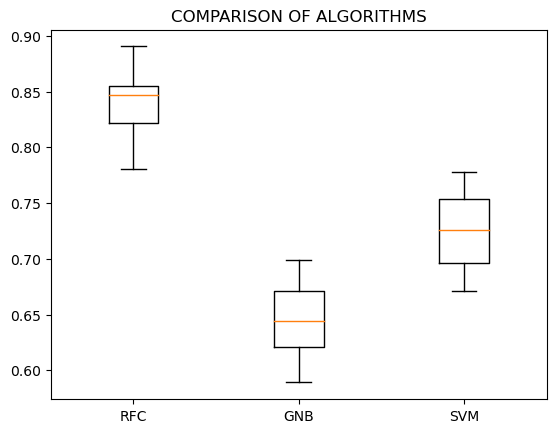

In [32]:
#COMPARISON OF ALGORITHMS
plt.boxplot(results, labels=names)
plt.title('COMPARISON OF ALGORITHMS')
plt.show()

THE BEST IS RFC IN THIS CASE :) THANKS!!!